## Time series data:
- What is a time series
- Frequency of the dataset
- defining the discrete and continous time series
- Talk about few example of uses of time series data
    - forecast
    - finance
    - business  
- Assumptions of past dependence
- seasonality treatment


## Notation: 
- capital letters of the greek alphabet (X or Y)
- entire period with capital T
- lower case t for a single period

## Intervals need to be identical
- adjusting the frequency depending on the value we need
- increasing or decreasing the frequency, using means or approximate missing values
- we also need chronological order, when forecasting we need to train our model, so we need to pick a point to separate the training dataset from the testing dataset.

## Importing the Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
sns.set()

## Importing the data

In [2]:
stock = yf.Ticker("^GSPC")
data = stock.history(start='1994-01-07', end='2018-01-29')
data = data.reset_index().drop(columns = ['Dividends', 'Stock Splits'])
sp500 = data.copy()

In [3]:
sp500.head()

,Date,Open,High,Low,Close,Volume
0,1994-01-07 00:00:00-05:00,467.089996,470.260010,467.029999,469.899994,324920000
1,1994-01-10 00:00:00-05:00,469.899994,475.269989,469.549988,475.269989,319490000
2,1994-01-11 00:00:00-05:00,475.269989,475.279999,473.269989,474.130005,305490000
3,1994-01-12 00:00:00-05:00,474.130005,475.059998,472.140015,474.170013,310690000
4,1994-01-13 00:00:00-05:00,474.170013,474.170013,471.799988,472.470001,277970000


In [4]:
sp500.describe()

,Open,High,Low,Close,Volume
count,6057.000000,6057.000000,6057.000000,6057.000000,6.057000e+03
mean,1287.508251,1295.148670,1279.399984,1287.845508,2.409163e+09
std,487.423209,488.426764,486.358896,487.549637,1.720768e+09
min,439.140015,444.720001,435.859985,438.920013,1.499000e+07
25%,990.469971,1001.789978,981.289978,990.640015,8.959000e+08
50%,1231.930054,1240.400024,1224.030029,1233.000000,2.121580e+09
75%,1460.250000,1469.540039,1451.300049,1460.250000,3.652120e+09
max,2847.479980,2872.870117,2846.179932,2872.870117,1.145623e+10


In [5]:
sp500.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                           
---  ------  --------------  -----                           
 0   Date    6057 non-null   datetime64[ns, America/New_York]
 1   Open    6057 non-null   float64                         
 2   High    6057 non-null   float64                         
 3   Low     6057 non-null   float64                         
 4   Close   6057 non-null   float64                         
 5   Volume  6057 non-null   int64                           
dtypes: datetime64[ns, America/New_York](1), float64(4), int64(1)
memory usage: 284.1 KB


## Plotting the Data

In [7]:
import matplotlib.pyplot as plt

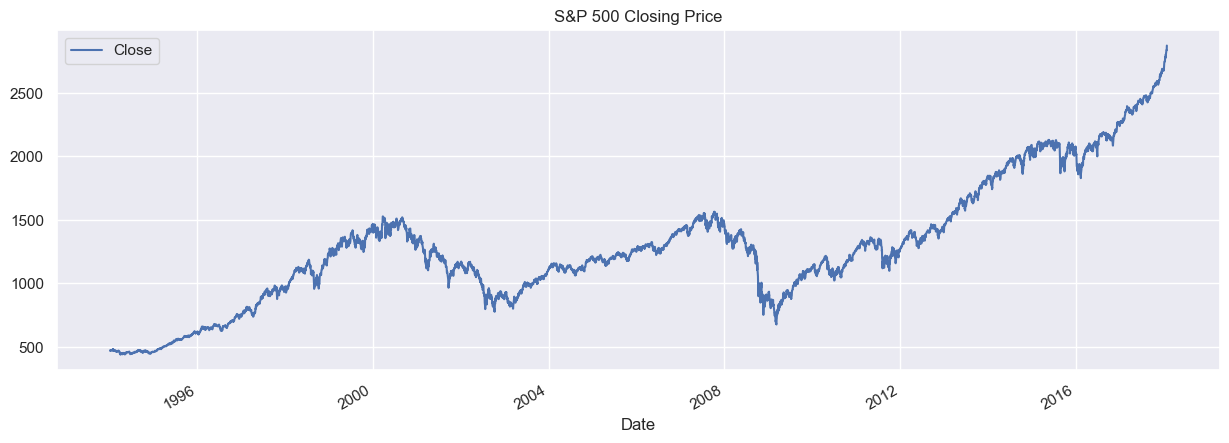

In [8]:
sp500.plot(x='Date', y='Close', title="S&P 500 Closing Price", figsize=(15,5))
plt.show()

## The QQ Plot

In [9]:
import scipy.stats
import pylab

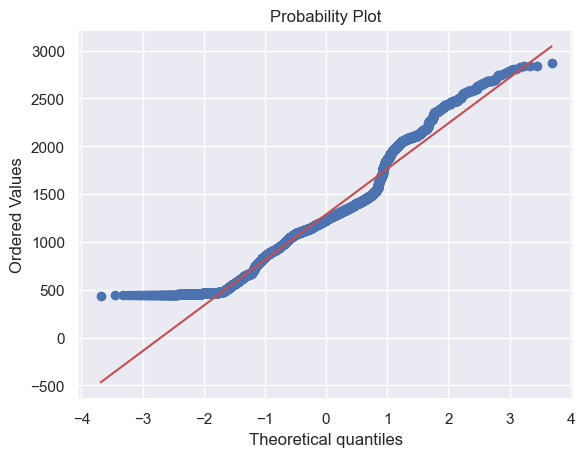

In [10]:
scipy.stats.probplot(sp500.Close, plot = pylab)
pylab.show()

# Trasforming the DataFrame into a Time-Series

In [11]:
sp500.Date = pd.to_datetime(sp500.Date).dt.date
sp500.head()

,Date,Open,High,Low,Close,Volume
0,1994-01-07,467.089996,470.260010,467.029999,469.899994,324920000
1,1994-01-10,469.899994,475.269989,469.549988,475.269989,319490000
2,1994-01-11,475.269989,475.279999,473.269989,474.130005,305490000
3,1994-01-12,474.130005,475.059998,472.140015,474.170013,310690000
4,1994-01-13,474.170013,474.170013,471.799988,472.470001,277970000


In [12]:
sp500.Date.describe()

count           6057
unique          6057
top       1994-01-07
freq               1
Name: Date, dtype: object

## Setting the Index

In [13]:
sp500.set_index('Date', inplace = True)
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1994-01-07,467.089996,470.260010,467.029999,469.899994,324920000
1994-01-10,469.899994,475.269989,469.549988,475.269989,319490000
1994-01-11,475.269989,475.279999,473.269989,474.130005,305490000
1994-01-12,474.130005,475.059998,472.140015,474.170013,310690000
1994-01-13,474.170013,474.170013,471.799988,472.470001,277970000


## Setting the desired frequency

In [14]:
sp500 = sp500.asfreq('b') #Setting the frequency to Business days so we avoid NaNs in out dataset
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1994-01-07,467.089996,470.260010,467.029999,469.899994,324920000.0
1994-01-10,469.899994,475.269989,469.549988,475.269989,319490000.0
1994-01-11,475.269989,475.279999,473.269989,474.130005,305490000.0
1994-01-12,474.130005,475.059998,472.140015,474.170013,310690000.0
1994-01-13,474.170013,474.170013,471.799988,472.470001,277970000.0


## Handling Missing Values

In [15]:
sp500.isna().sum()

Open      219
High      219
Low       219
Close     219
Volume    219
dtype: int64

In [16]:
sp500 = sp500.fillna(method = 'ffill')

In [17]:
sp500.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Splitting the Data
Discuss the splitting proportion process

In [18]:
size = int(len(sp500)*0.8)  # we use the int function to approximate to an integer

In [19]:
sp500_train = pd.DataFrame(sp500.Close.iloc[:size])
sp500_test = pd.DataFrame(sp500.Close.iloc[size:])

In [20]:
sp500_train.tail()

,Close
Date,
2013-03-29,1569.189941
2013-04-01,1562.170044
2013-04-02,1570.250000
2013-04-03,1553.689941
2013-04-04,1559.979980


In [21]:
sp500_test.head() # 17th and 18th were not business days so everything looks good

,Close
Date,
2013-04-05,1553.280029
2013-04-08,1563.069946
2013-04-09,1568.609985
2013-04-10,1587.729980
2013-04-11,1593.369995


# White noise
- Definition: A special type of time-series, where the data doesn't follow a pattern, so it is unpredictable
- To consider a series as white noise, it needs to satisfy 3 conditions: 
    - constant mean
    - constant variance
    - no autocorrelation in any period = no clear relationship between past and present values
- So it's a sequence of random data, where every value has a time-period associated with it (it behaves sporadically)
- In financial modelling it is importanto to distinguish white noise data from regular time-series data. We can do that by comparing the graphs
    - First we generate white noise and plot its values
    - Then we plot the graph of the S%P closing price and compare the two

## Generating the white noise

In [22]:
wn = np.random.normal(
    loc = sp500_train.mean(), 
    scale = sp500_train.std(), 
    size = len(sp500_train)
)

In [106]:
sp500_train['wn'] = wn
print(sp500_train.describe()) #the mean is similar but the distribution is different
sp500_train.head()

             Close           wn           rw
count  5020.000000  5020.000000  5020.000000
mean   1091.559936  1092.094644  1269.768387
std     292.515737   292.833162   444.086118
min     438.920013    77.257789   585.483034
25%     914.614990   892.612086   931.534971
50%    1144.614990  1091.962956  1156.237615
75%    1316.175018  1289.890432  1487.955831
max    1570.250000  2150.249808  2715.508720


,Close,wn,rw
Date,,,
1994-01-07,469.899994,959.378635,1122.139662
1994-01-10,475.269989,1068.130016,1080.347860
1994-01-11,474.130005,1218.208063,1082.095245
1994-01-12,474.170013,637.030018,1083.639265
1994-01-13,472.470001,517.572066,1067.146255


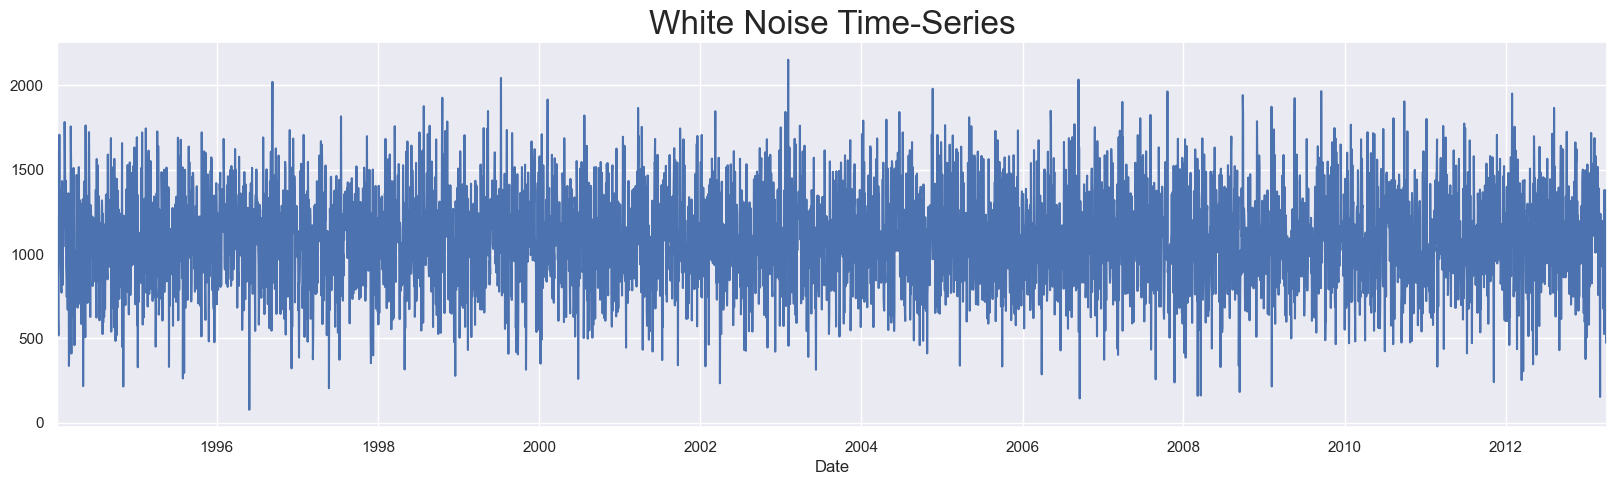

In [24]:
sp500_train.wn.plot(figsize = (20,5))
plt.title('White Noise Time-Series', size = 24)
plt.show()

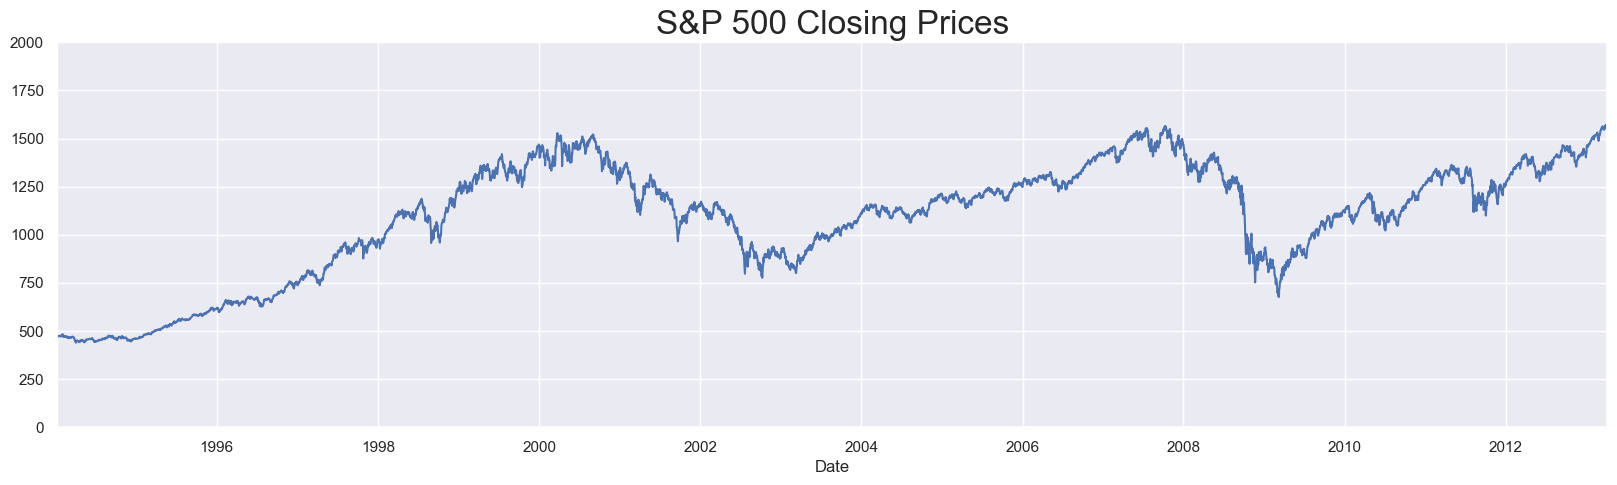

In [25]:
sp500_train.Close.plot(figsize = (20,5))
plt.title('S&P 500 Closing Prices', size = 24)
plt.ylim(0,2000) #so we have the same magnitude for the 2 charts, more comparable
plt.show()

## Random Walk
- Definition: A special type of time-series, where values tend to persist over time and the differences between periods are simply white noise.
- So for example let's say P is the price, and ε is the residual: 
    P(t) = P(t-1) + ε(t)
- Of course we assume that the residuals are white noise, so they are arbitrary and cannot be predicted, so this suggests that the best estimators for price today are prices yesterday. As we mentioned in time series data, pattern observed in past data will persist in the future. So the best estimators for tomorrow prices are today prices.

In [26]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index('date', inplace = True)
rw = rw.asfreq('b')

In [27]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [28]:
sp500_train['rw'] = rw.price

In [29]:
sp500_train.head()

,Close,wn,rw
Date,,,
1994-01-07,469.899994,959.378635,1122.139662
1994-01-10,475.269989,1068.130016,1080.347860
1994-01-11,474.130005,1218.208063,1082.095245
1994-01-12,474.170013,637.030018,1083.639265
1994-01-13,472.470001,517.572066,1067.146255


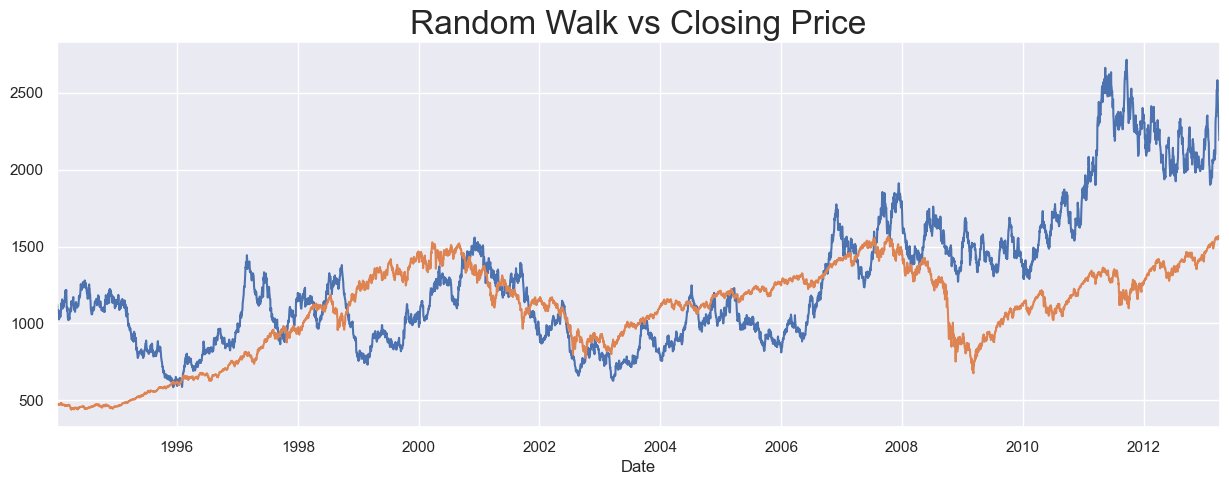

In [30]:
sp500_train.rw.plot(figsize = (15,5))
sp500_train.Close.plot()
plt.title('Random Walk vs Closing Price', size = 24)
plt.show()

## Explore the concept of Market Efficiency:
Measures the level of difficulty in forecasting correct future values. In general if the prices of a time series resemble that of a random walk, the price cannot be predicted with great accuracy. Conversely if future prices can be predicted with great accuracy then there are arbitrage opportunities. According to theory, if such opportunities exist within a market investors are bound to take advantage and as a result price adjust accordingly. That's why we expect for most markets to be quite efficient.

# Stationarity
Technically speaking, time series stationarity implies that taking consecutive samples of data with same size should have the same covariances regardless of the starting point. This is also known as **"weak-form stationarity"** or **"covariance stationarity"**. We can classify a time series as covariance stationarity if it satisfies 3 key assumptions:

- constant mean;
- constant variance;
- consistent covariance between periods at an identical distance from one another.

(An example is white noise.)

But when we usually talk about stationarity we refer to **"strict stationarity"**, where samples of identical size would have identical distributions. In math terms this means that for any strictly stationary random variable x, the distribution between x(t) and x(t+k), should be the same as the one between x(τ) and x(t+τ+k). It is rarely observed in nature. Hence in analytics it is universally accepted to use stationarity to describe covariance stationarity. So we will stick to this one.

To conduct time series analysis it is vital to determine whether the data follows a stationary or non-stationary process. Luckily statisticians **David Dickey and Wayne Fuller** developed a test to check whether a dataset comes from a stationary process, we call it the **Dickey-Fuller Test**.

The way this test works, is we test an hypothesis:
***H0: assumes Non-Stationarity*** (it assumes that the one lag autocorrelation coefficient is lower than one)
***H1: the data is stationary*** (the autocorrelation coefficient is equal to 1)
When we've computed the test statistic we can compare it to the critical value in the Dickey-Fuller Table. **If the test statistic is lower thant the critical value than we reject the null hypothesis, so the data comes from a stationary process.**

## Stationarity

In [31]:
import statsmodels.tsa.stattools as sts

In [32]:
sts.adfuller(sp500_train.Close)

(-1.7235500278863336,
 0.41902145605181135,
 18,
 5001,
 {'1%': -3.431658270286891,
  '5%': -2.8621181140235223,
  '10%': -2.5670777307913744},
 39897.58700341599)

**Dickey-Fuller's Test Output explanation:**
- In the first line we see the test statistic from running the test. Then we also have the 1, 5 and 10 percent critical values from the dickey fuller table. We can use them as level of significance in our analysis. Furthermore we can notice that the test statistic is greater than each of the critical values, thus for all these levels of significance we don't find sufficient evidence of stationarity in the dataset. 
- The second line expresses the p-value associated with the statistic. This p-value suggests that there's roughly a 40% chance of not rejecting the null, so we can't confirm the data is stationary. 
- The third line represents the number of lags used in the regression when determining the t statistic. in this case we have 18, so there's some autocorrelation going back 18 periods. Of course we'll take this into account when picking the right model. 
- Moving on to the next line it expresses the number of observations used in the analysis. This value depends on the number of lags used in the regression, so the two should usually add up to the size of the dataset.
- the last information of the output estimates the maximised information criteria provided there is some apparent autocorrelation. The lower the value, the easier it is to make predictions for the future. 

To provide some comparison to what these results mean, let's run a test for the white noise data we generated earlier.

In [33]:
sts.adfuller(sp500_train.wn)

(-71.19375280528965,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 70799.75438258174)

In [34]:
sts.adfuller(sp500_train.rw)

(-1.2789081750194664,
 0.6387657653528938,
 24,
 4995,
 {'1%': -3.43165984259144,
  '5%': -2.8621188086591505,
  '10%': -2.5670781005730454},
 46288.2145289187)

## Seasonality
Seasonality suggests that certain trends will appear on a cyclical basis. There are several ways of testing for seasonality. 
One approach is to decompose the sequence where we split up the time series into 3 effects: 
- Trend: pattern consistento throughout te data
- Seasonal: cyclical effects due to seasonality
- Residual: error of prediction or the difference between the actual data and the model we fit.

The simplest type of decomposition is called **naive**, with which we expect a linear relationship between the three parts and the observed time series. There are 2 main types of naive decomposition: **Additive or Multiplicative**
- **Additive**: assumes that for any time period the observed value is the sum of the trend, seasonal and residual for that period
- **Multiplicative**: assumes that the original series is a product of the trend, seasonal and residual.

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

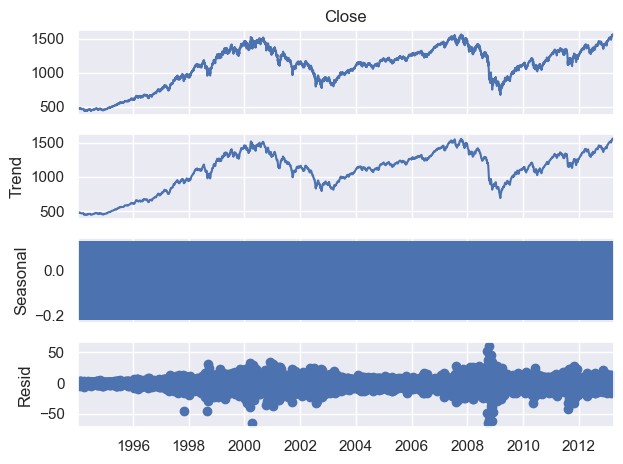

In [36]:
s_dec_additive = seasonal_decompose(sp500_train.Close, model = 'additive')
s_dec_additive.plot()
plt.show()

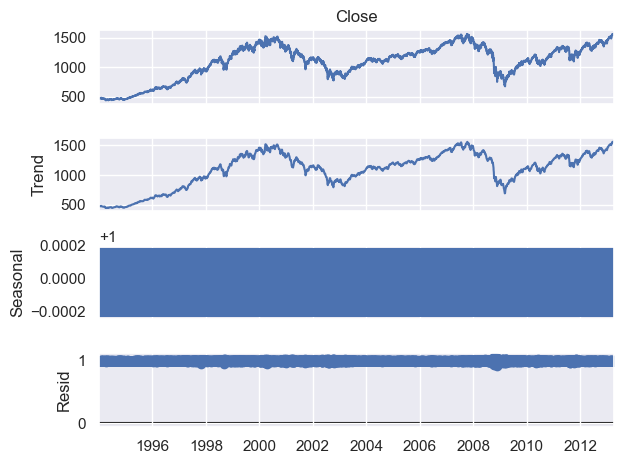

In [37]:
s_dec_multiplicative = seasonal_decompose(sp500_train.Close, model = 'multiplicative')
s_dec_multiplicative.plot()
plt.show()

## ACF
So, till now we know that we don't want to shuffle the data because we want to preserve the chronological order of the set. Well one of the main  reason is that se often discover links bewteen past and present values within T series data. Namely we find some relationships between the entries for consecutive periods T and T-1. 
Now let's define some important terms:
- Correlation: measures the similarity in the change of values of two series. In this case though we only have a single variable to caluculate the similarity and a single time series change through time, so we need to introduce a new concept: Autocorrelation
- **Autocorrelation**: represents the correlation between a sequence and itself, more precisely it measures the level of resemblance between a sequence from several periods ago and the actual data. Such a series is called **lagged**, because it is essentially a delayed version of the original one. For instance if we find the autocorrelation for a time series with daily frequency we are determining how much yesterday's values resemble today's values. If the frequency is instead annual autocorrelation will measure the similarities from year to year.

In [38]:
import statsmodels.graphics.tsaplots as sgt

It is vital to compute and compare autocorrelation values between different lags. To do so, we need to introduce the autocorrelation function or ACF for short. The ACF computes the autocorrelation value for however many lags we are interested in simultaneously. The alternative would be manually finding the correlation between our original data and multiple lagged versions of itself.
The Stats Graphics Plots package contains a method for plotting the autocorrelation function. We'll take advantage of it and use it to analyze time dependencies more efficiently. 

We'll start by calling the plot ACF method from the TSR plots package. Since we imported the library as Sgt for convenience, we'll write Sgt dot plot ACF. In addition, before running the cell, we need to pass values to some of the arguments of the method. 
- For starters, we must set time series we want to analyze. In this case, we want to find the ACF for the market index we are interested in, so we type DF market value in the parentheses. 
- Next, we have to assign a number to the Lag's argument because the default is the length of the time series. In a set with thousands of observations. Computing so many lag values would be extremely time consuming and unnecessary. In time series analysis. Common practice dictates analyzing the first 40 lags. So we set the lags equal to 40. Keep in mind that by saying the first 40 lags, we mean the last 40 periods before the current one.

- We can also set the zero argument equal to false. This argument indicates whether we include current period values in the graph. For correlation functions this is unnecessary because the correlation between a value and itself will always be one. This will lead to always having the first bar of the graph equal to one, which makes the plot more difficult to comprehend correctly. Therefore, setting the argument equal to false ensures we only observe a plot for higher lag values.

- As a final step, we should name the graph to avoid confusing similar graphs throughout our analysis. Adding titles to plots is a good practice in general because it makes it easier to keep track of the work you have done. You can also increase the size of the title to make it easier to spot. To do both of these, you simply need to call the title method and set the name and size as arguments. Use the PLT show method at the end of the cell.

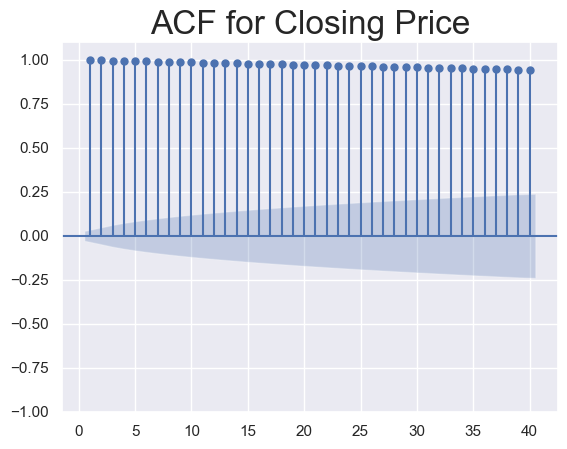

In [39]:
sgt.plot_acf(sp500_train.Close, lags = 40, zero = False)
plt.title('ACF for Closing Price', size = 24)
plt.ylim(-1, 1.1)
plt.show()

- Values on the x axis represent lags. You can notice how they go up to 40, since that is what we set the lags argument equal to. 
- Numbers on the left indicate the possible values for the autocorrelation coefficient. Correlation can only take values between -1 and 1, which is why the graph stops at one. You probably figured this out, but the thin line across the plot represents the Autocorrelation between the Time series and a lagged copy of itself. 
- The first line indicates Autocorrelation one time period ago. 
- The second line represents the coefficient value for two periods ago and so on. 
- The blue area around the x axis represents significance. 

The values situated outside are significantly different from zero, which suggests the existence of autocorrelation for that specific lag. Take a second to observe how this area expands as lag values increase. The greater the distance in time, the more unlikely it is that this autocorrelation persists. For instance, today's prices are usually closer to yesterday's prices than the prices a month ago. Therefore, we need to make sure the autocorrelation coefficient in higher lags is sufficiently greater to be significantly different from zero.

Notice how all the lines are higher than the blue region. This suggests the coefficients are significant, which is an indicator of time dependence in the data. Moreover, we can see that autocorrelation barely diminishes as the lags increase. This, in turn suggests that prices even a month back can still serve as decent estimators.

Before we move on, let's examine the ACF of the White Noise series we generated earlier. Being able to tell white noise apart from regular time series data is fundamental in modeling, but there'll be more on that toward the end of this section. In order to determine and plot the ACF of the white noise we generated, we should only change the sequence of values we are passing to the argument from DF market value to df n. 

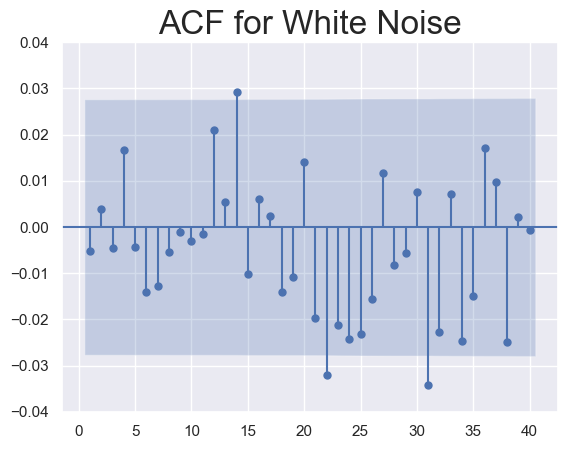

In [40]:
sgt.plot_acf(sp500_train.wn, lags = 40, zero = False)
plt.title('ACF for White Noise',size = 24)
plt.ylim(-0.04, 0.04)

plt.show()

Let's pay attention to the plot and how it is completely different from the one for closing prices. For starters, we have values going either way. So there are patterns of positive and negative autocorrelation. This contrasts the ACF for closing prices where all values were positive. Also observe how all the lines fall within the blue area. Thus, the coefficients are not significant across the entire plot. This suggests there is no autocorrelation for any lag, which is one of the assumptions of white noise data.

For homework you can check the ACF for a random walk and try to analyze and interpret the results.

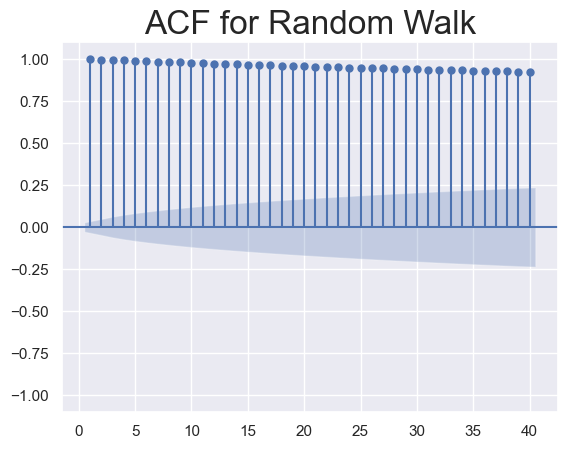

In [41]:
sgt.plot_acf(sp500_train.rw, lags = 40, zero = False)
plt.title('ACF for Random Walk',size = 24)
plt.ylim(-1.1, 1.1)
plt.show()

## PACF

Autocorrelation measures the similarity between a time series and a lagged version of itself. However, the coefficients also capture second hand effects.
For instance, examine the value of the autocorrelation coefficient for the third lag. It captures **direct and indirect** ways in which the lagged series affects the original one. By indirect, we refer to all other channels through which passed data affects current data. In this specific case, the second hand effects come in the form of prices three days ago affecting value two and one day ago, which in turn affects present prices. If we wish to determine only the direct relationship between the Time series and its lagged version, we need to compute the **partial autocorrelation**. To do this, we can use a function like the ACF called the partial autocorrelation function or simply **pacf**. Let's get coding and plot the pacf for S&P 500 closing prices.

Conveniently enough, the stats models TSA graphs package we imported earlier also includes a function called plot pacf. Much like its ACF counterpart, The plot PACF method requires defining several arguments and just as before, 
- the first one is the **Time series** we are examining. 
- The second one is the **Lags argument**, which we will set to 40 once again as stated before. 40 is the optimal number of lags we usually choose for time series analysis. 
- Just like with the ACF, we set the **zero parameter** to false. 
- Since there are several ways of computing the pacf, we need to define what method we want to use. In this instance, we will rely on the **order of least squares** or ols for short. Hence we set the **method argument equal to ols**.

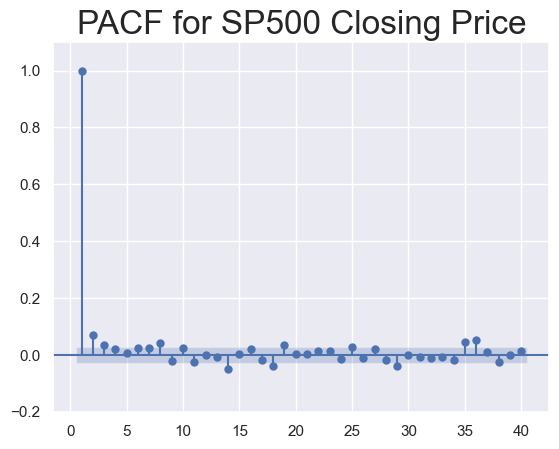

In [42]:
sgt.plot_pacf(sp500_train.Close, lags = 40, zero = False, method = 'ols')
plt.title('PACF for SP500 Closing Price', size = 24)
plt.ylim(-0.2, 1.1)
plt.show()

Now, we should take some time to observe the plot in more detail. Only the first several elements are significantly different from zero. A tremendous contrast to the ACF plot, where all values up to 40 lags were significant. Also, some of the values, like the ninth lag, are negative. This means that higher values nine periods ago result in lower values today and vice versa. The difference between the two graphs comes from the way the pacf works. It cancels out all additional channels in which a previous period value affects the present one. For instance, the pacf measures the effect values in period t minus two have on values in period t **directly**.

Compared to the values from the ACF function, the PACF ones cancel out the effects prices two days ago have on prices yesterday, which in turn affect prices today. Therefore, the **ACF shows the combined effect of the prices from two days ago, both direct and through yesterday's prices**, while **the PACF only shows the direct effect**. However, we must note that ACF and PACF values for the first lag should be identical. This is because there are no other channels through which past values can affect present values. Also notice how most values after the third lag are within the blue area. This means they aren't significantly different from zero, so the numeric values attached to them are not important. Since we can assume they are all essentially zero. Being positive or negative is somewhat random without any lasting effects. 

We have random walk and white noise data, so let's check out what their pacf plots look like. Let's start with white noise. By definition, there should be no autocorrelation between the elements of a white noise sequence. Thus, we expect the values for all periods to be insignificant. To plot the graph, we can copy the code from earlier and only change the time series from DF market value to df n.

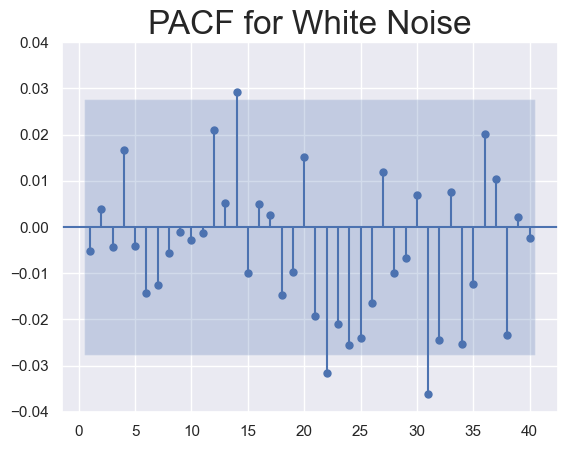

In [43]:
sgt.plot_pacf(sp500_train.wn, lags = 40, zero = False, method = 'ols')
plt.title('PACF for White Noise', size = 24)
plt.ylim(-0.04, 0.04)
plt.show()

As anticipated, most of the values aren't significantly different from zero. Some of the coefficients can end up outside the blue area and seem significant, but that is completely random. This aligns with our previous assumption that **there exists no autocorrelation in white noise**. As a practical exercise, you can plot the pacf for the random walk data and then analyze and interpret its coefficients. Now that we've introduced the ACF and PACF, we can discuss what makes a model a good fit.

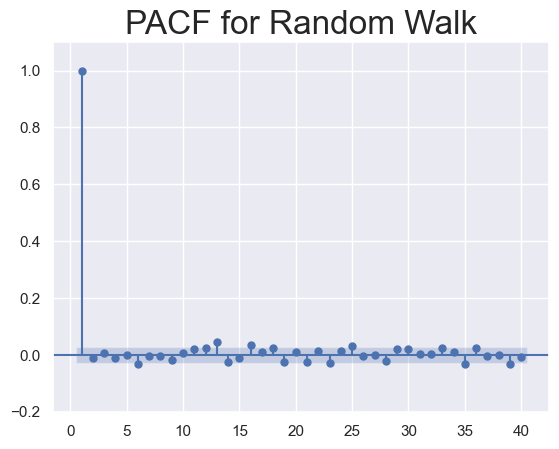

In [44]:
sgt.plot_pacf(sp500_train.rw, lags = 40, zero = False, method = 'ols')
plt.title('PACF for Random Walk', size = 24)
plt.ylim(-0.2, 1.1)
plt.show()

## Picking the correct model

When conducting time series analysis using supervised machine learning, we need to know how to select the most appropriate model. In this short lecture, we'll follow the steps to finding the best approximator.

- We usually start with a simple model and expand it as long as it follows several conditions. For starters, **the new coefficients for the more complex model need to be significantly different from zero**. If that does not hold true, the estimators for these parameters are essentially zero. Therefore, they don't help us estimate future values. This means they hold no predictive powers, so we must omit them and revert back to the simpler model. 
- Secondly, we want our model to be **parsimonious** or in other words, as simple as possible. Generally, we prefer using a **simpler model** to a more complicated one, unless the latter provides significantly better predictions. 
- To determine whether the predictions are significantly better we introduce a statistical test called the **log likelihood ratio test**. However, the LR test can only be applied to models with different degrees of freedom. Thus, when comparing several models with the same total number of required lags, we need to compare the information criteria of each one. The lower the coefficient, the less data the model requires to make accurate predictions.
    - The two most prominent measurements of the kind are the AIC and Bic. Since we prefer simplicity, we opt for the model with **lower AIC and Bic** coefficients.

- If our model fits well, there should be no trend we have failed to account for. Therefore, **the residuals for the model should resemble white noise** so we can conclude **there is no other pattern we can account for without overtraining our model**. Just a short note. By overtrain, we mean that our model describes the given data too well and might perform underwhelmingly against a different data set.

These are the pillars of Autocorrelation and the different ways to measure it. Now we can jump ahead and start learning different models. In the next section, we are going to introduce what an Autoregressive model is, what its order represents, and how to choose the correct one.

# The Autoregressive (AR) Model

Welcome Back In Time series, we often observe similarities between past and present values. That's because we encounter correlation within such data. By knowing the prices today, we can often make a rough prediction about prices tomorrow. So in this lecture we are going to introduce such a model. 

The Autoregressive model or AR model for short relies on past period values and past periods only to predict current period values. It's a linear model where current period values are a sum of past outcomes multiplied by a numeric factor. For instance, if we take X as a time series variable, then an example of an AR model would look something like this.
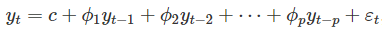
X in period T, equals some constant C, + a numeric coefficient Phi times X in period T-1, plus epsilon t.

Let's go over the different parts of this equation to make sure you understand the notation.

- X T minus one represents the values of X during the previous period. if T is the current period and we have weekly values, then t minus one would represent last week's value.

- The coefficient phi is any numeric constant by which we multiply the lagged variable. You can interpret it as the part of the previous value which remains in the future. It's good to note that these coefficients should always be between -1 and 1. *Let me explain why. If the absolute value of the coefficient is greater than one, then over time it would blow up immeasurably. his idea can seem confusing at first. So let's take a look at a mathematical example. Say we have a coefficient for Phi equal to 1.3 and a time series with 1000 observations. Then the value at period 2 would equal 1.3 times x in period one. Since x three equals 1.3 times x2, we can substitute x2 and get 1.3 to the power of two times x1. Then as the more periods accumulate, the more the coefficient increases. When we get to the 1,000th period, we would have x 1000 equals 1.3 to the power of 999 times x one. This implies that the value keeps on increasing and ends up much higher than the initial one. Obviously not a reliable way to predict the future.*

- Now, the only part of the equation we need to break down is Epsilon T. It's called the residual and represents the difference between our prediction for period T and the correct value. These are usually unpredictable differences because if there's a pattern, it will be captured in the other incumbents of the model. 

Now that we know what all the parts of the model represent, let's try to interpret it. According to the equation, values at a given period are equal to some portion of prices in the last period, plus some constant benchmark and unpredictable shocks.

Before we go on, it is vital to understand that we don't just use any AR model on a given dataset. 

1) We first need to **determine how many lags to include in our analysis**. *For example, a Time series about meteorological conditions wouldn't solely rely on the weather statistics a day ago. It's realistic to say it would use data from the last seven days. Hence, the model should take into account values up to seven periods back. From a mathematical point of view, a model using two lags would look as follows. X in period T equals some constant C plus a numeric coefficient phi one times x in period T minus one plus Phi two times x in period T minus two plus epsilon t. As you can expect, a more complicated model would consist of even more lagged values. X in T minus N and their associated coefficients Phi. The more lags we include, the more complicated our model becomes, the more complicated the model, the more coefficients we have to determine. And as a result, the more likely it is that some of them would not be significant.* Now in general, a model which takes into account more data to make a prediction is usually better. However, if the coefficients are not significantly different from zero, they would have no effect on the predicted values, so it makes little sense to include them. **To determine the correct number of lags we should incorporate in our model. We rely on the autocorrelation and partial autocorrelation functions.**

In the next lecture, we are going to examine market index prices and their respective ACF and Pacf graphs.

## Examining the ACF and PACF of Prices in Time-Series
In this lecture we are going to observe the ACF and PACF of prices to determine the appropriate number of lags we need to incorporate into an AR model.

Since we already examine the ACF and Pacf of the S&P 500, when we introduce the two functions, we'd better work with the FTSE values this time around.  We've already seen how to employ the plot ACF and plot Pacf methods, but it's still a good idea to quickly reiterate. We introduced the stats models, graphics, TSR Plots library which we imported as Sgt and called the appropriate method from it. We are starting with the ACF in this case, so we add plot ACF. When in the parentheses we refer to the Time series we are analyzing, which happens to be DF market value. We then assign values to several of the important arguments like zero. And lags. Before setting a title to the plot we can also use the title method to name the plot because it allows us to increase the font size and make it easier to read. To achieve this, we set the size parameter to some numeric value like 20. Now we've already seen what the ACF looks like for the S&P. So we know how to interpret the graphs.

## Importing the relevant packages

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

In [46]:
import warnings
warnings.filterwarnings("ignore")

## Importing the Data and Pre-processing 

In [47]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [48]:
df_comp['market_value']=df_comp.ftse

In [49]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

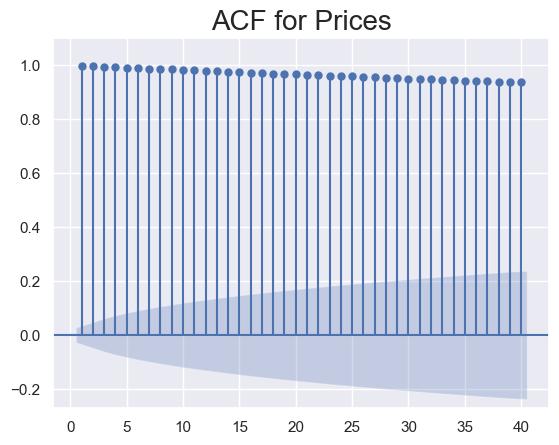

In [50]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.ylim(-0.27, 1.1)
plt.show()

We see a pretty similar graph where all 40 lagged coefficients are significant and slowly declining. Furthermore, all of them are positive and between 0.9 and 1 which indicates that **the effects barely deteriorate over time**.
These parallels suggest the two time series are similar in the way they behave and the way past values affect present ones. 
Generally **we prefer parsimonious models** since they make for a more reasonable predictors and **prevent us from overfitting the data**. The more lags we include, the better our model will fit the dataset we feed it. Now **the risk is that the coefficients might predict the data set too well, which makes the model prone to mistakes when trying to forecast future values**. 

Okay, we know that the ACF captures both direct and indirect effects a previous value has on the current one. Since we want to get the most efficient model, we only wish to include past lags which have a direct significant effect on the present. Hence we should examine the pacf before constructing a model with 40 lagged coefficients. 

Let's call the plot method from the Sgt package and assign values to the most important arguments as we did in the previous section. We can also use the title method to name the plot. Then we can run the cell and interpret the results. 

## The PACF

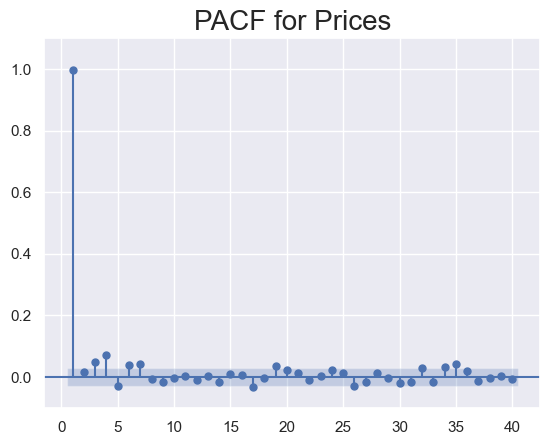

In [51]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.ylim(-0.1, 1.1)
plt.show()

Notice how we have coefficients of different size. Coefficients that are negative as well as coefficients which are not significant. This is vastly different from the ACF graph we just looked at. 
Now you can observe that coefficients from the 25th lag onwards are not significant. So we can just ignore them. 
To elaborate **since the coefficients will be extremely close to zero, we assume their impact on the model is minimal, so they're not relevant to us. Thus our model must include less than 25 lags**. 
Another observation is that values after the 22nd lag are negative. At first glance, this seems somewhat odd, but knowing the specifics of our data, we can find a reasonable explanation. Since the frequency of the data is in business days and there are roughly 22 business days in a month, we can anticipate some cyclical changes every month. In other words, the values a month ago negatively affect the values today. In reality, we can see that these changes are vastly overshadowed by the ones occurring i later periods when it comes to impact. So we should not overanalyze their contribution. Please note that we won't be able to always spot such a convenient pattern in our data. So this short explanation only applies to the current dataset. Okay. Finally, we're certain that the value for our first lag is greatly significant, so we must include it in our model. Next time we'll try starting with a model, including only the first lag. See how it fits the data and analyze its coefficients. 

## The AR(1) Model
In this lecture, we're going to see how to fit a time series into a simple auto regression model. To achieve this, we're going to use the **Statsmodels TSA Arima model library** to import the Arma method. 

For starters, we need to store the values of the method to see how they fit the model. Hence, we must create a variable called Model AR because we are storing the specifics for this autoregressive model in it.

Next, we should set it equal to the output of the Arma method. Of course, we need to pass on several arguments so that Python knows what data we're using and what specific type of autoregressive model we're testing on. So the first argument we pass is the Time series we want to model. In this case, that's the set containing FTSE prices we stored under the market value column in the data frame. Next, we need to define the specific model we wish to use. Since this is a simple autoregressive model, we need to set the order argument to one comma zero. The one here represents the number of past values we wish to incorporate into the model. The zero represents the fact that we're not taking any of the residual values into consideration. We'll explain why the latter can also be important in the next section of the course. For now, all you need to know is that an order of one zero is called a simple AR(1) model. 

In [52]:
from statsmodels.tsa.arima.model import ARIMA

In [53]:
model_ar = ARIMA(df.market_value, order=(1,0,0))

After defining the model, we need to see how it fits the data and what values it assigns to the constant C and the coefficient phi. To do so, we'll call the fit method on our newly created model AR.
Running the cell will result in fitting the model or, in other words, finding the most appropriate coefficients. Let's examine what actually happened. To achieve this, we can create a summary of the results conveniently supplied by the summary method. So we should write results_ar.summary()

In [54]:
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Fri, 16 Feb 2024   AIC                          55251.207
Time:                        18:11:39   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6375    423.327     12.023      0.000    4259.932    5919.343
ar.L1          0.9984      0.001   1147.579      0.000       0.997       1.000
sigma2      3511.3844     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This table of abridged details about the model contains several important parts we'll be examining throughout this course.
For now, let's only focus on the lower part, which contains the coefficients and their associated P values.
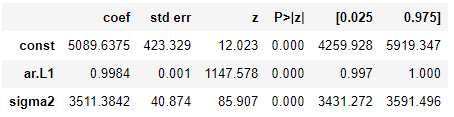
The first column contains all the variables, the model estimates. In this case, we only have two, Const and ar.Ll. Intuitively the first one represents the constant C and the coefficient column contains its supposed value. The other variable is Phi1 from our theoretical model. This suggests that this is the coefficient for the auto regressive value from one lag ago for the Associated Time series.

Now that that's clear, let's look at the numeric values more closely and explain what each column of the table represents.

As we stated a moment ago, the coefficient column represents the numeric values associated with C and Phi one from the AR model we defined earlier in the section. The next column contains the standard errors. It's a measure of how far away on average the model's predictions are from the true values. Next is the Z column, which contains the associated test statistics for significance with the P values on its right. Since the P values are zero for both, we can safely conclude that the constant and the one lag value are both significantly different from zero. The last two columns represent the critical values for the 95% confidence interval. If zero is not a part of it, we can confirm the coefficients are significant. Okay. We notice that Phi is 0.9985, which is approximately one. That's something which coincides with the information we got from the ACF and the PACF graphs. Now, since both coefficients are significantly different from zero, we can try fitting a more complex model for greater accuracy. In the next lecture, we're going to create such models with several lags and see how the predictions change.

## Higher-Lag AR Models

Last time we saw how to fit a simple autoregressive model to a dataset. Since both the constant and the coefficient for one period ago were significant, we want to test if a more complicated model will be a better estimator. In this lecture, we're going to learn how to fit an autoregressive model for as many lags as we want. We'll analyze each one individually and then use the log likelihood ratio test to determine whether a more complex model makes better predictions.

Okay, Now that we have our expectations set, let's get coding. We'll start by building an AR(2) model. In case you need a hint, an AR(2) model will determine prices today based on prices up to two periods ago. The code we're about to write is not much different from the one for the simple autoregressive model, so we can reuse most of it. In fact, we only need to alter the order argument from (1,0,0) to **(2,0,0)**.

Since we wish to compare various models later in the lecture, we are going to store the values for each one. Let's call this model variable **model_ar_2** and its results **results_ar_2**.

Throughout the lesson, we'll keep assigning similar names based on the number of lags we use for each model.

In [55]:
model_ar_2 = ARIMA(df.market_value, order = (2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Fri, 16 Feb 2024   AIC                          55251.898
Time:                        18:11:39   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.080      -0.002       0.036
sigma2      3510.1277     41.037     85.535      0.000    3429.696    3590.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now let's examine the summarize table.
We can see there are now three variables in the first column rather than the two we had before. In addition, the coefficients for Phi one and the Constant have changed. That's because some of the changes in prices can be justified by the prices two days ago. However, let's observe the P values of each parameter.
Notice how the P value for the new parameter is 0.080. Since the value is greater than 0.05, we can reject the null hypothesis. This suggests that the coefficient for the second lag isn't significantly different from zero. Therefore we assume it's equal to zero. In layman's terms, this means that the price is two days ago do not severely affect those of today. A possible explanation is that all the effects they have are captured in yesterday's price, thus adding additional information doesn't provide significant value.

Now, before we reach any final conclusions, we should check the coefficients for the R3 and R4 models. Usually, the more lags we include, the better our predictions become. However, we run the risk of overfitting. Let's compute the summarize tables for those two models and then introduce the log likelihood test, which will tell us if the more complex models are worth using.

We can start by fitting the R three model. We already did the same for the r two model in this lecture, so you should be able to replicate the code without much difficulty. Simply change the values of the order argument and then rename some of the variables storing the model and its results. 


In [56]:
model_ar_3 = ARIMA(df.market_value, order = (3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Fri, 16 Feb 2024   AIC                          55241.925
Time:                        18:11:39   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.583     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.021      -0.057      -0.005
ar.L3          0.0489      0.009      5.383      0.000       0.031       0.067
sigma2      3502.2643     41.020     85.379      0.000    3421.866    3582.662
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3286.97
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Fri, 16 Feb 2024   AIC                          55217.359
Time:                        18:11:39   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.959     12.985      0.000    4321.415    5857.867
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.033      -0.055      -0.002
ar.L3         -0.0224      0.013     -1.784      0.074      -0.047       0.002
ar.L4          0.0728      0.009      8.033      0.000       0.055       0.091
sigma2      3484.0262     41.922     83.108      0.000    3401.861    3566.191
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3044.18
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

See how the second period coefficient is now negative. This differs greatly from what we had previously. However, its P value is still greater than 0.05, so we can't confidently say the parameter is significantly different from zero.
Therefore its sign is of little importance since we will equate it to zero if we decide to use this model.


Do you notice how the log likelihood located in the top right of the table has increased? Since the absolute value has decreased. But we are dealing with negative numbers, the log likelihood has increased. As a general rule, we prefer models with a higher log likelihood, but lower information criterion.
Since that happens to be the case, we need to use the log likelihood ratio test or LLR test for short to determine whether the two models are significantly different.

For convenience. **Let's define a function for the log likelihood ratio test so we can reuse the code time and time again. We will name it test for short. It's going to take three parameters: mod_1, mod_2 and DF**. Of course, the first two are short for the models we want to compare and df the degrees of freedom. We usually only compare models with a single difference in this department. So we're going to set the default value for DF to be equal to one. What we're going to do next is fit the two models and store their associated log likelihoods in the variables **L1 and L2**. To achieve this, we use the **llf** attribute for each model. Then we compute the test statistic for this test which we will name **LR**. 
After computing this, we'll rely on the **chi squared method and pass the LR and degrees of freedom as parameters**. The value we store from calling said method will be the p-value we wanted to find. Since we want to have a nice numeric representation of the P value, we're going to round the result to three decimal places. We do so by calling the round method when storing the variable. We end the function by returning the variable storing the p value result. Great. Now that we've defined the function, we can use it to compare the two models. 

## LLR Test

In [58]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher-Lag AR Models

In [59]:
LLR_test(model_ar_2, model_ar_3)

0.001

In [60]:
LLR_test(model_ar_3, model_ar_4)

0.0

After calling the test, we see that the difference in log likelihood is significant. This suggests we should opt for the more complicated model. Similarly, we get a significant difference in the log likelihoods if we run the test for the R3 and R4 models. We can repeat the same process of fitting a more complicated model and checking if it gives us distinguishably greater log likelihoods until we reach a model where it doesn't. Moreover, the said model should also have its last lag, not be significantly different from zero. 

If we wish to examine the results of the model and the P value simultaneously, we must use the print function. In such cases, it is a good idea to add some clarifying message to ensure we know which part of the output the P value is. Of course we do so by adding the text in quotation marks. Transforming the numbering value into a string. And concatenating them via summation. This all sounds overly confusing, but as you can see, the code is extremely simple.

In [61]:
model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Fri, 16 Feb 2024   AIC                          55217.359
Time:                        18:11:41   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.959     12.985      0.000    4321.415    5857.867
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.0

For homework. Make sure to incrementally increase the complexity of the AR model by trying out AR five, six and seven. 

In [62]:
model_ar_5 = ARIMA(df.market_value, order=[5,0,0])
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_4, model_ar_5)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -27600.460
Date:                Fri, 16 Feb 2024   AIC                          55214.920
Time:                        18:11:41   BIC                          55260.570
Sample:                    01-07-1994   HQIC                         55230.916
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    386.229     13.178      0.000    4332.646    5846.635
ar.L1          0.9788      0.010     97.867      0.000       0.959       0.998
ar.L2         -0.0293      0.013     -2.176      0.0

In [63]:
model_ar_6 = ARIMA(df.market_value, order=[6,0,0])
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_5, model_ar_6)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -27596.587
Date:                Fri, 16 Feb 2024   AIC                          55209.174
Time:                        18:11:42   BIC                          55261.345
Sample:                    01-07-1994   HQIC                         55227.455
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    396.931     12.822      0.000    4311.670    5867.612
ar.L1          0.9800      0.010     96.873      0.000       0.960       1.000
ar.L2         -0.0333      0.014     -2.438      0.0

In [64]:
model_ar_7 = ARIMA(df.market_value, order=[7,0,0])
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_6, model_ar_7)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -27592.022
Date:                Fri, 16 Feb 2024   AIC                          55202.044
Time:                        18:11:43   BIC                          55260.736
Sample:                    01-07-1994   HQIC                         55222.610
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    405.380     12.555      0.000    4295.110    5884.172
ar.L1          0.9783      0.010     95.742      0.000       0.958       0.998
ar.L2         -0.0304      0.014     -2.183      0.0

In [65]:
model_ar_8 = ARIMA(df.market_value, order=[8,0,0])
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_7, model_ar_8)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -27591.854
Date:                Fri, 16 Feb 2024   AIC                          55203.708
Time:                        18:11:45   BIC                          55268.922
Sample:                    01-07-1994   HQIC                         55226.560
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    407.243     12.498      0.000    4291.459    5887.822
ar.L1          0.9787      0.010     95.719      0.000       0.959       0.999
ar.L2         -0.0305      0.014     -2.183      0.0

From my analysis prior to preparing this lecture. The first model where both conditions are satisfied is R eight. Let's see what it's summarized table of results suggests and also what its test P value is. Okay, so after defining the R7, we can just copy the code we used for the R3 and make all the necessary adjustments. Those include altering the order and names of all important variables. Great job. We can see that the p value for the eighth lag is indeed insignificant and the test P value is 0.57. Both of those indicate that including prices from eight periods ago does not improve our model in any notable way. That's why we stop with the R seven, even though it may contain some non significant values. 

Since the simple AR model served as a good predictor, we should use the test once again to make sure that adding six additional lags is worth it. Make sure to put the simpler model first and also set the degrees of freedom to six by passing a value to the DF argument. 

In [66]:
print('LLR test: ' + str(LLR_test(model_ar, model_ar_7, DF=6)))

LLR test: 0.0


Not surprisingly, the complex model yields a significantly greater log likelihood, so we decide to stick with it. Now, some of the results we got seemed rather confusing. On the one hand, the AR one model served as a better predictor than the AR two model, but higher lag models **outperformed it even with several non-significant coefficients**. All in all, it seemed that the more lags we introduce, the better our model becomes. This is often the case when using AR models to predict Non-stationary data. To avoid such issues, we should use a stationary time series.

In the next lecture, we're going to explore the main approach financial analysts take when examining non stationary prices.

# Using Returns instead of prices
When we introduced AR models, we purposefully omitted to state that they model stationary processes best. Hence, if the data comes from a non stationary process, then the AR family of models will do poorly in finding the true relationship between the data. Earlier we saw that S&P prices resemble a random walk, but we never tested whether FTSE ones do as well. We can do this by calling the augmented dickey-fuller test and interpreting the results. We already learned how to do this, but let's quickly reiterate just in case. We call the ad fuller method from the STS library and put the FTSE values as an argument. 

In [67]:
sts.adfuller(df.market_value)

(-1.9041551418836828,
 0.33010893277028497,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

After running the cell, we see that the P value equals 0.33. So we can't conclusively say the data comes from a stationary process. That's why we can assume it is extracted from a non stationary process. This suggests that we shouldn't rely on AR models to make accurate forecasts. But what can we do in such cases?

Well, our best bet is **transforming the dataset so that it fits the stationary assumptions**. In finance, the common approach is to **use returns instead of prices when measuring financial indices**. For anybody unfamiliar with the term returns expressed, the percentage change between the values for two consecutive periods.

Let's see how we can create the returns out of prices. We need to take the value of a period t and subtract the value for period T minus one from it. Then we'd have to divide that value by the value of the earlier period t minus one and finally multiply the result by a factor of 100 to get the percentage values. Lucky for us, **Pandas provides a method we can use called PCT change**.

As the name suggests, it returns the percentage change between the current and prior element. We can pass a value to the periods argument to determine the distance in time between the periods we
want to compare. The default value is one, so we don't need to specify it in this particular case. We should note that Pandas returns the percentages expressed as real numbers. To clarify, the method uses 0.02 instead of 2%. To turn these values into the pure percentages we're used to we can multiply the entire time series by 100. We do so by applying the **Mul method**, which is short for multiply. The value we put in parentheses is the factor by which we are multiplying the entire series. In our case, the factor equals 100. We can stack the two methods and simply add dot mul 100 at the end of the percent change line.

Remember that we need to record these values in order to examine them later, since it is easiest to just add them to the data frame, we can store them in a new column titled Returns. Of course, the name of the variable is completely up to you, but using clear and indicative names is a good practice.

**Note that we'll have one return value fewer than the prices.**
That's because we won't have any returns for the first period. We can't have any increase or decrease from the previous value if there are no previous values. Makes sense, right? Having missing values means there will be no way to find the correlation between the first and any other period. This will cause the auto correlation functions failure to generate any coefficients. To avoid such issues, we simply remove the first period prices. Since we have several thousand observations, doing so should not significantly affect our data. We can overwrite these values by calling the Iloc method into the data frame and typing one followed by a colon between the brackets. This means the new data frame would have all the elements of the old one starting from the second period. This is due to numbering encoding language starting from zero rather than one. So the row with index one is actually not the first one. Right. 


In [68]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

In [69]:
sts.adfuller(df.returns)

(-12.770265719497397,
 7.798058336032513e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

To make sure the returns don't come from a stationary process we need to run the augmented dickey-fuller test once again. The code necessary to achieve this is essentially the same one we used for FTSE prices but this time we'll pass the New Time series as an argument. Fantastic. The test statistic falls far to the left of even the 1% critical value which we see below as well. Thus, we can confidently state that the data comes from a stationary process. This is exactly what we were aiming for when switching from prices to returns. Marvelous work, everyone.

Now we have a good understanding of why we use returns and how to compute them. So let's turn our attention to their ACF and Pacf plots as we try to model the newly created Time series.

# Examining the ACF and PACF of Returns
In this lesson, we're going to find and interpret the autocorrelation and partial autocorrelation functions of the returns on FTSE values. Since we've already seen how to compute these plots, we can directly start interpreting the results. Let's begin with the ACF.

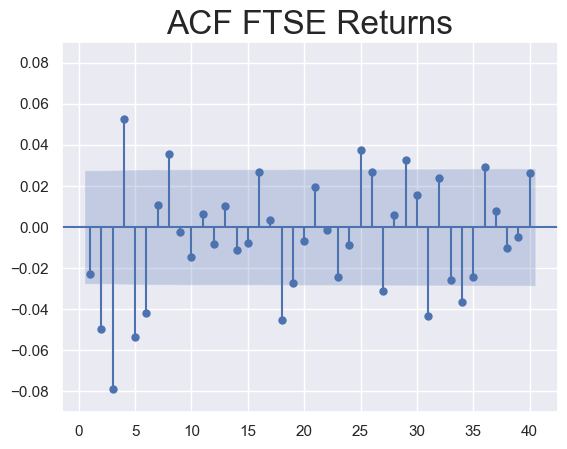

In [70]:
sgt.plot_acf(df.returns, lags = 40, zero = False)
plt.title("ACF FTSE Returns", size = 24)
plt.ylim(-0.09, 0.09)
plt.show()

The plot greatly differs from what we saw with prices. For starters, not all coefficients are positive or significant. Additionally, values greatly vary in magnitude instead of all being close to one. By the looks of it, the first several lags are of great importance. Since they are significant, but their coefficients are negative. That points to a trend where consecutive values move in different directions. This suggests that returns over the entire week are relevant to those of the current one. Since the relationship is negative, we can interpret this as some form of natural adjustment occurring in the market. Before we make any final decisions on what model we want to implement, let's first look at the partial autocorrelation function. Just as was the case for the ACF. We have already shown how to plot this for prices, so we only need to adjust the time series we are using.

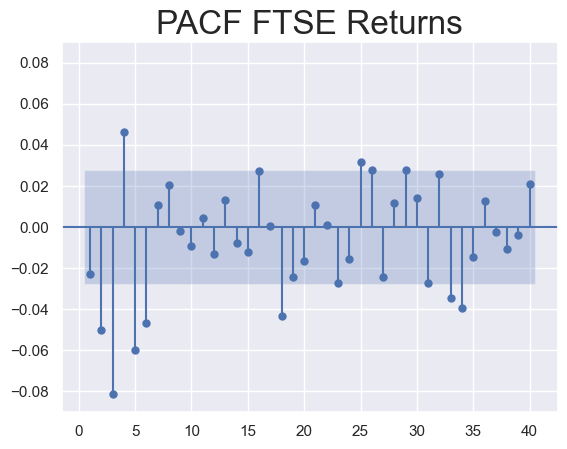

In [71]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = 'ols')
plt.title("PACF FTSE Returns", size = 24)
plt.ylim(-0.09, 0.09)
plt.show()

The results look uncannily similar to those we got for the ACF. One way to interpret this is that prices today often move in the opposite direction of prices yesterday. Hence we tend to get price increases following price decreases, which falls in line with our expectation of cyclical changes. Intuition dictates that the further back we go, the less relevant the coefficient values should be. That's because the majority of effects they have on current values should already be accounted for due to the recursive nature of autoregressive models.

We are now ready to explore how a simple R model performs when predicting returns.

# Fitting and AR(1) Model for Index Returns

In [72]:
model_ret_ar_1 = ARIMA(df.returns, order = (1,0,0))

In [73]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [74]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7929.749
Date:                Fri, 16 Feb 2024   AIC                          15865.497
Time:                        18:11:47   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.143      0.253      -0.013       0.051
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2         1.3790      0.014    100.092      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.72
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In this lecture we are going to see how well a simple autoregressive model can be used to predict footsie returns.
We start by creating a variable to contain the model.

What immediately captures our attention is that the p values of both parameters are over 0.05. This means that neither is significantly different from zero. So this model holds no real predictive power. This can be explained by the impact past values can have on yesterday's prices. The more easily yesterday's price is affected by higher lags, the more inaccurate its coefficient becomes. This is because of the accumulated compounding effects of lagged coefficients. Of course, this directly decreases the predictive power of the model. Therefore, we should proceed by testing whether a higher lag model serves as a better predictor.

# Higher-lags AR Model for Returns
In this lecture, we're going to test whether more complicated ones do a better job. We're going to begin by fitting an AR two model, analyzing its coefficients and then running the log likelihood ratio test. 

In [75]:
model_ret_ar_2 = ARIMA(df.returns, order = (2,0,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7923.456
Date:                Fri, 16 Feb 2024   AIC                          15854.911
Time:                        18:11:47   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.194      0.233      -0.012       0.050
ar.L1         -0.0242      0.009     -2.799      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.371      0.000      -0.065      -0.035
sigma2         1.3756      0.014     99.592      0.000       1.348       1.403
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7730.29
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

We can see immediately that the p value for the second lag is zero. This means that Phi two is significantly different from zero and should be included in the model. Also, the P value for the first period has decreased further. Maybe if we add more lags, it will actually become significant. Since the p value for the new coefficient is zero, we suspect that the change in log likelihood is also significant. To be completely certain we still run the test for the R1 and R2 models. Make sure to put the simpler model first and the more complicated one second when calling the function. We get a p value of less than 1%, which supports the claim that this model is a better fit than the previous one. Also, we can notice that all three ICS or information criterion are lower than they were for the R one model. 

What about an AR 3 model?

In [77]:
model_ret_ar_3 = ARIMA(df.returns, order = (3,0,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -7906.738
Date:                Fri, 16 Feb 2024   AIC                          15823.477
Time:                        18:11:48   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.272      0.203      -0.010       0.048
ar.L1         -0.0283      0.009     -3.199      0.001      -0.046      -0.011
ar.L2         -0.0521      0.008     -6.684      0.000      -0.067      -0.037
ar.L3         -0.0815      0.008    -10.192      0.000      -0.097      -0.066
sigma2         1.3664      0.014     94.518      0.000       1.338       1.395
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6859.16
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.0

This time, all of the coefficients related to past values are significant at the 5% level. Since the P value for the newest lag is zero yet again, we expect the LLR test to suggest that this model is better than the previous one. To avoid any uncalled errors. We should run the test anyway. As expected, we get a very small number zero. So the two log likelihoods are distinctly different. What we see next is that the information criteria are lower once again, so we can safely assume this model outperforms its simpler counterpart.


In [79]:
model_ret_ar_4 = ARIMA(df.returns, order = (4,0,0))
results_ret_ar_4 = model_ret_ar_4.fit()
results_ret_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -7901.330
Date:                Fri, 16 Feb 2024   AIC                          15814.661
Time:                        18:11:49   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.208      0.227      -0.012       0.049
ar.L1         -0.0245      0.009     -2.770      0.006      -0.042      -0.007
ar.L2         -0.0496      0.008     -6.327      0.000      -0.065      -0.034
ar.L3         -0.0802      0.008     -9.995      0.000      -0.096      -0.064
ar.L4          0.0464      0.008      5.650      0.000       0.030       0.063
sigma2         1.3635      0.015     92.776      0.000       1.335       1.392
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6580.94
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
LLR_test(model_ret_ar_3, model_ret_ar_4)

0.001

In [81]:
model_ret_ar_5 = ARIMA(df.returns, order = (5,0,0))
results_ret_ar_5 = model_ret_ar_5.fit()
results_ret_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -7892.390
Date:                Fri, 16 Feb 2024   AIC                          15798.779
Time:                        18:11:50   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.273      0.203      -0.010       0.048
ar.L1         -0.0217      0.009     -2.396      0.017      -0.040      -0.004
ar.L2         -0.0544      0.008     -6.826      0.000      -0.070      -0.039
ar.L3         -0.0831      0.008    -10.406      0.000      -0.099      -0.067
ar.L4          0.0449      0.008      5.431      0.000       0.029       0.061
ar.L5         -0.0596      0.008     -7.468      0.000      -0.075      -0.044
sigma2         1.3586      0.015     92.526      0.000       1.330       1.387
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6398.87
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
LLR_test(model_ret_ar_4, model_ret_ar_5)

0.0

In [83]:
model_ret_ar_6 = ARIMA(df.returns, order = (6,0,0))
results_ret_ar_6 = model_ret_ar_6.fit()
results_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7886.945
Date:                Fri, 16 Feb 2024   AIC                          15789.890
Time:                        18:11:51   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.324      0.186      -0.009       0.047
ar.L1         -0.0245      0.009     -2.640      0.008      -0.043      -0.006
ar.L2         -0.0523      0.008     -6.505      0.000      -0.068      -0.037
ar.L3         -0.0870      0.008    -10.853      0.000      -0.103      -0.071
ar.L4          0.0424      0.008      5.133      0.000       0.026       0.059
ar.L5         -0.0607      0.008     -7.568      0.000      -0.076      -0.045
ar.L6         -0.0466      0.009     -5.216      0.000      -0.064      -0.029
sigma2         1.3557      0.015     92.513      0.000       1.327       1.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6487.37
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
LLR_test(model_ret_ar_5, model_ret_ar_6)

0.001

In [85]:
model_ret_ar_7 = ARIMA(df.returns, order = (7,0,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -7886.647
Date:                Fri, 16 Feb 2024   AIC                          15791.294
Time:                        18:11:52   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.304      0.192      -0.010       0.047
ar.L1         -0.0240      0.009     -2.579      0.010      -0.042      -0.006
ar.L2         -0.0517      0.008     -6.375      0.000      -0.068      -0.036
ar.L3         -0.0874      0.008    -10.725      0.000      -0.103      -0.071
ar.L4          0.0433      0.008      5.183      0.000       0.027       0.060
ar.L5         -0.0601      0.008     -7.463      0.000      -0.076      -0.044
ar.L6         -0.0463      0.009     -5.173      0.000      -0.064      -0.029
ar.L7          0.0109      0.009      1.205      0.228      -0.007       0.029
sigma2         1.3555      0.015     91.777      0.000       1.327       1.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6448.20
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
LLR_test(model_ret_ar_6, model_ret_ar_7)

0.44

The test fails and we get higher AIC or Bic values for returns. This occurs when fitting the AR seven model. Since it fails on every aspect. When comparing it with the R6, we opt for the simpler model.

Modeling prices and returns for a single market is extremely useful. But if we wish to compare how different ones perform, we should account for the varying magnitude between countries. In the next lecture, we are going to explore the **process of normalizing a data set.**

# Normalizing Values

We mentioned that we prefer relying on returns rather than prices when using R models. This is because of the non-stationary nature of prices. Normalization can mean several different things, but in the case of time series, when we normalize a set of values, we basically map every value of the sample space to the percentage of the first value
of the set. The resulting series is much easier to compare with other time series in general. By normalizing to time series, we can compare how well they perform relative to one another. This gives us a better understanding of which ones to invest in and which ones to avoid. For instance, a flat increase of $100 in the price of the S&P will be a much more significant change than the same absolute increase in the price of the Nikkei. Since Nikkei, prices are usually several times higher. However, an increase in the price for S&P equivalent to 5\% of the original value is comparable to the same percentage increase for the Nikkei. 

Let's see how we compute these normalized prices. For starters, we need to set some benchmark. This value should be used as the central piece we use to compare all subsequent values of the Time series. We could pick any date within our data set, but the interpretation seems easiest if we simply go with the value for the first period. To extract said value from the data frame, we can use the .iloc method. Since the first element is the one with an index of zero, then we simply write df.market_value.iloc[0]

We plan on using this value going forward. That's why we're going to assign it to a variable. For convenience, we can simply call it a benchmark. Next. We need to divide all the values in the set by this number so we apply the div method and put the variable in parentheses. We also multiply by a factor of 100 because we prefer working with percentages. For convenience we can stack these methods one after the other. So we add .mul(100) to the line of code.

As we've mentioned several times over, are models work best with stationary data. So we need to run the augmented dickey-fuller test before we are certain the values are useful. Let's call the ad fuller method from the STS library and interpret the P value.

In [87]:
benchmark = df.market_value.iloc[0]
df['norm'] = df.market_value.div(benchmark).mul(100)
sts.adfuller(df.norm)

(-1.8928710132672344,
 0.33542220743300755,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

As was the case with non normalized prices, we can see that the test yields a high P value which suggests non stationarity. Thus normalizing prices did not result in stationary data. Therefore, we will not be able to use an AR model with the normalized prices. However, normalization is still a great practice for comparing time series. 

Let's go a step further and normalize the returns instead. Suppose historically, the S&P provides significantly higher returns than Nikkei. For instance, Nikkei yields a steady 2\% increase over a given period, while the S&P returns an average 3\% in the same time span. Then it returns for both are around the 3\% mark for the period we are observing. Nikkei is significantly outperforming its expectations. So to avoid any biased comparison when analyzing the two sets, we often rely on normalized returns. They account for the absolute profitability of the investment in contrast to prices. Plus, they allow us to compare the relative profitability as opposed to non normalized returns. Overall, they are much more reliable measurements than the other two. To generate these normalized returns. We retrace our steps back to when we did the same for prices, but use the return series we generated earlier. Thus we compute the benchmark using the Iloc method. Then divide by the outcome and convert into percentages by multiplying by a factor of 100.

Now, once again, let's test if the data comes from a stationary process. Since the series was derived from the returns set, which was also stationary, we suspect the Dickey-fuller test will suggest Stationarity once again. Even though we only change the magnitude of the data after normalizing, we should always double check and actually run the test. 

## Normalized Returns

In [88]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-12.770265719497367,
 7.79805833603357e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

As was the case with Non-normalized returns. The test statistic is significantly smaller than the 1\% critical value of -3.43 shown below. Therefore, we can say with great certainty that this data is stationary. Furthermore, we can conclude that normalizing does not affect Stationarity.

We are going to analyze normalized returns and non normalized returns. This should provide us with enough understanding of why one is much more preferred than the other.

## Model Selection for Normalized Returns

We've already gone through the process of fitting different lagged models for both prices and non normalized returns. So we're going to take the exact same course of action in this lecture. We're going to start by fitting a simple autoregressive model for the normalized returns and build up until we find one that describes the data best. 

We start once again by fitting the simple autoregressive model and examining the table. The P values are both greater than 0.1, so we can't be conclusively certain they are non zero. Do you recall that we had observed something very similar for non normalized returns? Before we move on to more complicated models, let's observe the summarized table for non normalized returns once again. 

In [89]:
model_norm_ret_ar_1 = ARIMA(df.norm_ret, order = (1,0,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -40351.743
Date:                Fri, 16 Feb 2024   AIC                          80709.487
Time:                        18:11:54   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731     10.476     -1.143      0.253     -32.506       8.560
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2      5.617e+05   5612.960    100.071      0.000    5.51e+05    5.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.68
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We can notice that all the values for Phi One are absolutely identical between the two tables. If this persists, we can safely assume that normalizing does not have any effect on model selection. To be on the safe side. Let's fit an AR two model and compare the outcomes to the AR two results for non normalized returns. We know how to do both by now. So you can copy the code we've used and make the necessary changes. After doing so and displaying the two summarize tables, we find the exact same trend. Normalizing the values only had an impact on the constant, but not on any of the lagged coefficients. Therefore, we can suspect that the same model that failed for regular returns would also fail for normalized returns.

In [90]:
model_norm_ret_ar_2 = ARIMA(df.norm_ret, order = (2,0,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -40345.450
Date:                Fri, 16 Feb 2024   AIC                          80698.901
Time:                        18:11:54   BIC                          80724.986
Sample:                    01-10-1994   HQIC                         80708.041
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731     10.050     -1.191      0.234     -31.671       7.725
ar.L1         -0.0242      0.009     -2.797      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.368      0.000      -0.065      -0.035
sigma2      5.603e+05   5628.139     99.561      0.000    5.49e+05    5.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7730.40
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
LLR_test(model_norm_ret_ar_1, model_norm_ret_ar_2)

0.0

In [92]:
model_norm_ret_ar_7 = ARIMA(df.norm_ret, order = (7,0,0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -40308.642
Date:                Fri, 16 Feb 2024   AIC                          80635.285
Time:                        18:11:55   BIC                          80693.975
Sample:                    01-10-1994   HQIC                         80655.851
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.262     -1.293      0.196     -30.126       6.179
ar.L1         -0.0240      0.009     -2.577      0.010      -0.042      -0.006
ar.L2         -0.0517      0.008     -6.370      0.000      -0.068      -0.036
ar.L3         -0.0874      0.008    -10.717      0.000      -0.103      -0.071
ar.L4          0.0433      0.008      5.178      0.000       0.027       0.060
ar.L5         -0.0601      0.008     -7.457      0.000      -0.076      -0.044
ar.L6         -0.0463      0.009     -5.169      0.000      -0.064      -0.029
ar.L7          0.0109      0.009      1.204      0.228      -0.007       0.029
sigma2      5.524e+05   6023.895     91.707      0.000    5.41e+05    5.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6448.21
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
model_norm_ret_ar_6 = ARIMA(df.norm_ret, order = (6,0,0))
results_norm_ret_ar_6 = model_norm_ret_ar_6.fit()
results_norm_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -40308.940
Date:                Fri, 16 Feb 2024   AIC                          80633.880
Time:                        18:11:55   BIC                          80686.050
Sample:                    01-10-1994   HQIC                         80652.161
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.123     -1.312      0.189     -29.854       5.908
ar.L1         -0.0245      0.009     -2.639      0.008      -0.043      -0.006
ar.L2         -0.0523      0.008     -6.501      0.000      -0.068      -0.037
ar.L3         -0.0870      0.008    -10.846      0.000      -0.103      -0.071
ar.L4          0.0424      0.008      5.130      0.000       0.026       0.059
ar.L5         -0.0607      0.008     -7.562      0.000      -0.076      -0.045
ar.L6         -0.0466      0.009     -5.213      0.000      -0.064      -0.029
sigma2      5.524e+05   5975.606     92.451      0.000    5.41e+05    5.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6487.31
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Let's just check how well the AR seven predicts normalized returns. We see the exact same pattern as before, so we should stick with the AR six model. This means using normalized values has no impact on model selection.

With regard to the theory we've been through so far, we still haven't explored the errors. They will indicate to us if we are omitting any major trends in the data.

# Examining the AR model Residuals

In this lecture we are going to: 
1) extract the residuals for all the models we believe to be good fits. 
2) Then we'll examine a summary of their statistics before testing them for stationarity. Ideally, the residuals should follow a random walk process, so they should be stationary. 
3) Finally, we are going to apply the Dickey-fuller test before plotting the values. Make sure to use the appropriate notebook since the newly created returns file will not contain the variables storing the correct models for prices.

To extract the residuals of the results of a model we need to simply call the resid argument. Now, since we want to associate the residual for each time period, we're going to add a new column to our dataset and call it rez price, which will contain the errors for prices. Previously we decided that the AR(7) model was the best fit for prices. So we must use the model_ar_7 variable.

Since we need to extract this from the results, we should fit the data first and then select the resid argument. Alternatively, we could also use the results of the model since we already stored them. To get a general feel of the data we can use the mean and variance method to find the expected value and variance of the distribution of the residuals. 

The mean is close to zero, which suggests that on average our model performs well. But the high variance indicates the residuals are not concentrated around the mean of zero but are all over the place. This is primarily because our models perform poorly when predicting Non-stationary data. Now. We still need to run the Dickey-fuller test to see if the time series is stationary. We call the Add fuller method from the STS package and use the newly generated time series as an argument. After running the cell, we get a p value equal to zero. This suggests stationarity. So the error terms fit our expectations so far.

Do you recall that the coefficients for the autocorrelation function of white noise should all be zero? To make sure the errors of our predictions are random. We should examine the ACF of the residual values. The good news is we are already familiar with the plot ACF method and the arguments we need to provide it with.

Just make sure you remember to add an appropriate title to the plot and set the font size. After plotting the function, we can see that the majority of coefficients fall within the blue region. As you know, this suggests they are not significantly different from zero, which fits the characteristics of white noise. However, the few points that fall outside this area lead us to believe that there's an even better predictor. 

Next, we must plot the values of the residuals to see if they resemble what we are used to expecting from white noise data. We do so by calling the plot method onto the New Time series. The graph looks nothing like the original ones we had for prices. We cannot find any obvious pattern for the data, so our choice of model seems correct. It's important to note that since we used an AR model on non stationary data, our predictions might still be far from great.

All right. Now we're going to repeat our actions for the residuals of returns. Make sure to use the appropriate notebook. Once again, we add a column to our existing data frame by taking the resid attribute. The only difference is that this time we use the associated model for returns rather than prices. It's crucial to remember that we decided that AR(6) rather than R seven was the suitable choice for price returns.

Next we find the mean and variance once again. And their values are closer to what we might expect from white noise data. A mean extremely close to zero and a variance of around one indicate that our choice of model was pretty good.

Running the Dickey-fuller test returns values close to those of the price residuals. So we have confirmation that the data is stationary. Since white noise is stationary, this is exactly what we wanted. As we just saw. The next step is to compute the ACF and examine the coefficients. Of course we can just copy the code we ran earlier and only change the time series from df raise price to df raise ret. Splendid. We can observe a very similar scenario where most, but not all coefficients are not significant. Hence, our model is a good predictor. But we have a good reason to believe a better one exists.

Finally we plot the data. As was the case with prices. Our residuals are mostly low, except for around the end of 2008. This, of course, coincides with the start of the Great Recession, which few people could have anticipated. However, analysts have adapted to account for such unpredictable events. So in the next lecture, we are going to expand our modeling skills with this idea.

In [94]:
df['res_price'] = results_ar_7.resid

In [95]:
df.res_price.mean()

0.6794634952946188

In [96]:
df.res_price.var()

3468.00359945781

In [97]:
sts.adfuller(df.res_price)

(-70.79902033430737,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54832.16404317004)

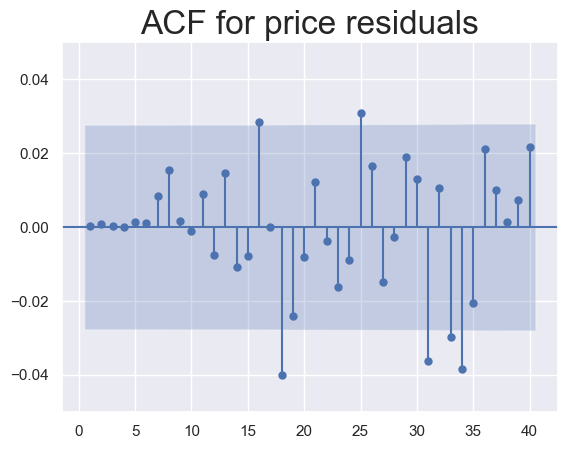

In [98]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF for price residuals", size = 24)
plt.ylim(-0.05, 0.05)
plt.show()

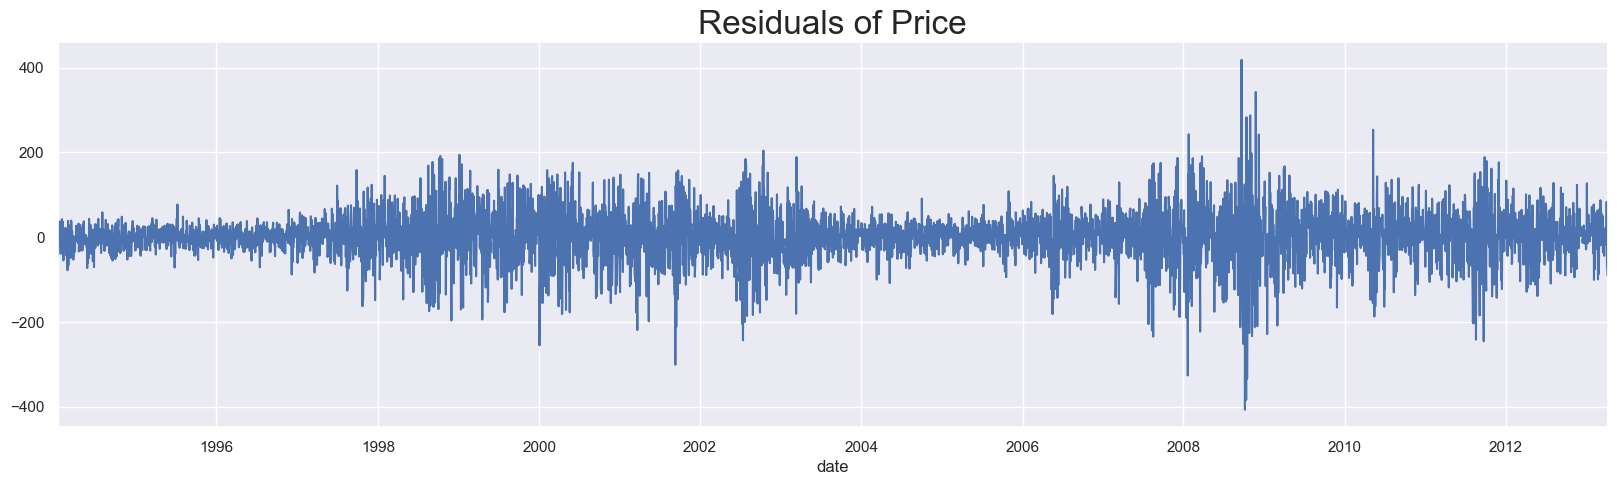

In [99]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Price", size=24)
plt.show()

In [100]:
df["res_ret"] = results_ret_ar_6.resid

In [101]:
df.res_ret.mean()

-4.85303781723007e-05

In [102]:
df.res_ret.var()

1.3559802128715308

In [103]:
sts.adfuller(df.res_ret)

(-70.7841183625032,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570807333144)

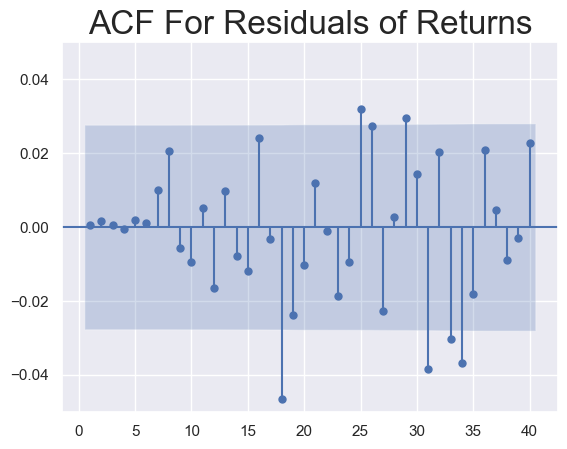

In [104]:
sgt.plot_acf(df.res_ret, zero = False, lags = 40)
plt.title("ACF For Residuals of Returns", size = 24)
plt.ylim(-0.05, 0.05)
plt.show()

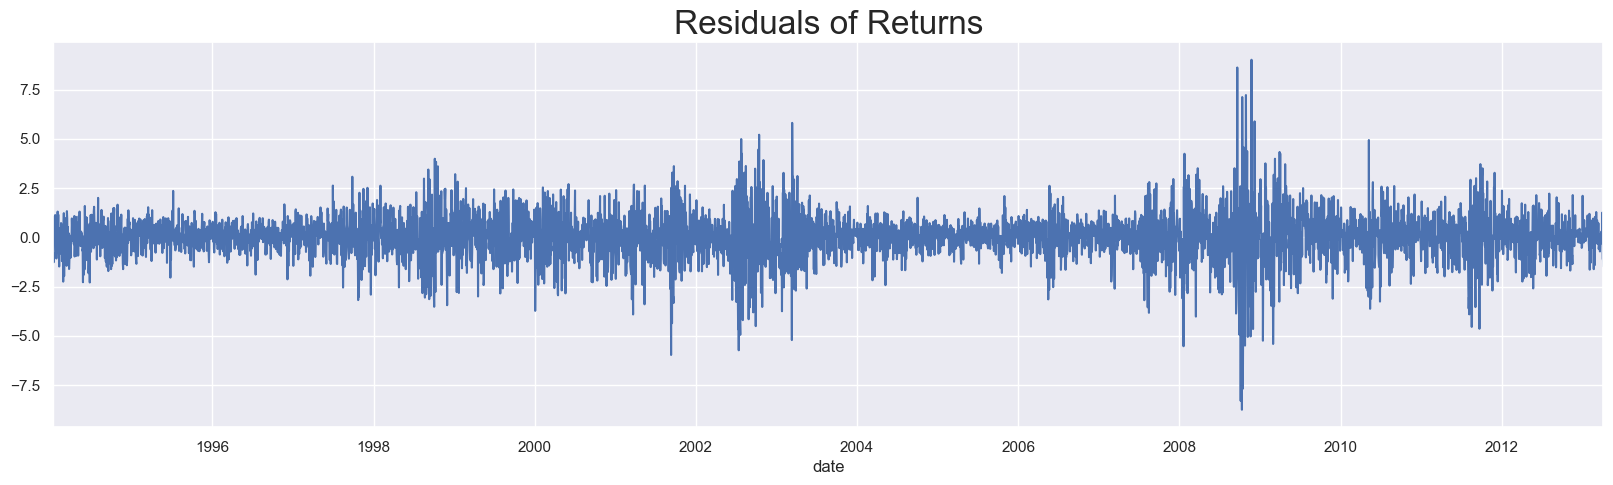

In [105]:
df.res_ret[1:].plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()